In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re
import string
import warnings
from pathlib import Path
from time import time

import arviz as az
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import pymc3 as pm
import seaborn as sns
from theano import tensor as tt

In [3]:
import src.modeling.simulation_based_calibration_helpers as sbc
from src.data_processing import achilles as achelp
from src.data_processing import common as dphelp
from src.io import cache_io
from src.loggers import logger
from src.modeling import pymc3_analysis as pmanal
from src.modeling import pymc3_sampling_api as pmapi
from src.models.speclet_seven import SpecletSeven
from src.plot.color_pal import FitMethodColors, ModelColors, SeabornColor
from src.project_enums import ModelFitMethod

In [4]:
notebook_tic = time()

warnings.simplefilter(action="ignore", category=UserWarning)

gg.theme_set(
    gg.theme_bw()
    + gg.theme(
        figure_size=(4, 4),
        axis_ticks_major=gg.element_blank(),
        strip_background=gg.element_blank(),
    )
)
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 838
np.random.seed(RANDOM_SEED)
HDI_PROB = 0.89

In [5]:
sp7 = SpecletSeven("expt", debug=True, noncentered_param=True)

In [6]:
sp7.cache_manager.mcmc_cache_exists()
sp7._reset_model_and_results()
sp7.cache_manager.clear_mcmc_cache()
sp7.cache_manager.mcmc_cache_exists()

[06/15/21 09:26:53] INFO     ArvizCacheManager: MCMC cache exists.      ]8;id=1623763613.449159-968452;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:273

                    WARNING  Reseting all model and results.             ]8;id=1623763613.4538682-769843;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:132

False

In [7]:
sbc_dir = sp7.cache_manager.cache_dir / "sbc"

sp7.run_simulation_based_calibration(
    results_path=sbc_dir,
    fit_method=ModelFitMethod.MCMC,
    random_seed=RANDOM_SEED,
    size="medium",
    fit_kwargs={
        "mcmc_draws": 1000,
        "tune": 1000,
        "chains": 4,
        "cores": 4,
        "prior_pred_samples": 1000,
        "post_pred_samples": 1000,
    },
)

                    INFO     Generating mock data of size          ]8;id=1623763613.598899-273247;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:305
                             'medium'.

                    INFO     Applying 2 data transformations.      ]8;id=1623763613.896372-228015;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:129

                    INFO     Applying transformation: '_drop_sgrna ]8;id=1623763613.912448-664600;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             s_that_map_to_multiple_genes'

[06/15/21 09:26:54] WARNING  Dropping 0 sgRNA that map to multiple ]8;id=1623763614.0079842-937293;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:249
                             genes.

                    INFO     Applying transformation:              ]8;id=1623763614.088778-897904;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             '_drop_missing_copynumber'

                    WARNING  Dropping 0 data points with missing   ]8;id=1623763614.108036-135869;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:259
                             copy number.

                    INFO     Calling `model_specification()` method.     ]8;id=1623763614.1242461-73689;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:172

                    INFO     Beginning PyMC3 model specification.        ]8;id=1623763614.129591-295476;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:159

                    INFO     Getting Theano shared variables.            ]8;id=1623763614.153825-242446;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:166

                    INFO     Creating PyMC3 model for SpecletSeven.      ]8;id=1623763614.1698391-121827;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:181

[06/15/21 09:27:13] INFO     Applying 2 data transformations.      ]8;id=1623763633.560769-720355;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:129

                    INFO     Applying transformation: '_drop_sgrna ]8;id=1623763633.56533-436835;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             s_that_map_to_multiple_genes'

                    WARNING  Dropping 0 sgRNA that map to multiple ]8;id=1623763633.5854552-679742;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:249
                             genes.

                    INFO     Applying transformation:              ]8;id=1623763633.59294-865919;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             '_drop_missing_copynumber'

                    WARNING  Dropping 0 data points with missing   ]8;id=1623763633.637679-301524;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:259
                             copy number.

                    INFO     Updating the MCMC sampling parameters.      ]8;id=1623763633.658935-592736;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:250

                    INFO     Beginning MCMC sampling.                    ]8;id=1623763633.6673121-505009;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:277

/usr/local/Caskroom/miniconda/base/envs/speclet/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, a_offset, μ_a_offset, μ_μ_a_offset, σ_a, σ_σ_a, σ_μ_a, σ_σ_μ_a, σ_μ_μ_a, μ_μ_μ_a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 545 seconds.
The number of effective samples is smaller than 10% for some parameters.


posterior predictive variable lfc's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


[06/15/21 09:37:04] INFO     Finished MCMC sampling - caching results.   ]8;id=1623764224.979824-139437;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:290

                    INFO     Caching InferenceData to '/Users/admin/Lab ]8;id=1623764224.9873018-520484;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:245
                             _Projects/speclet/models/speclet-six_expt/                      
                             mcmc/inference-data.nc'.

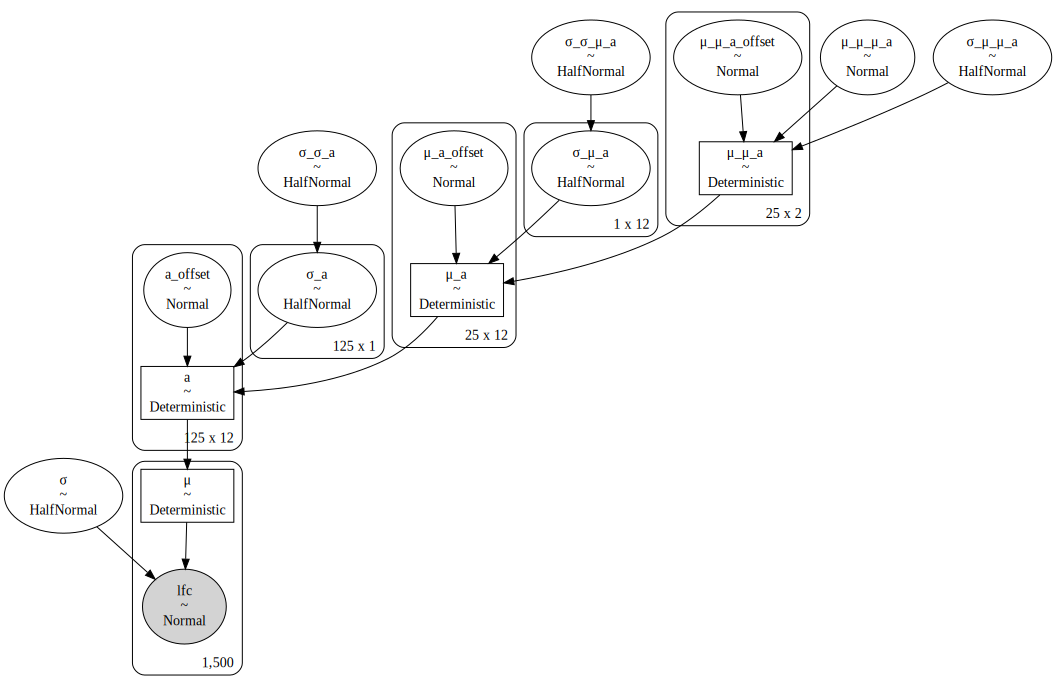

In [8]:
pm.model_to_graphviz(sp7.model)

## Visualization of the mock data

In [9]:
mock_data = sp7.data_manager.get_data()
mock_data.head()

depmap_id hugo_symbol   lineage p_dna_batch   screen         sgrna  \
0  cellline0       gene0  lineage0      batch0  screen0  gene0_sgrna0   
1  cellline0       gene0  lineage0      batch0  screen0  gene0_sgrna1   
2  cellline0       gene0  lineage0      batch0  screen0  gene0_sgrna2   
3  cellline0       gene0  lineage0      batch0  screen0  gene0_sgrna3   
4  cellline0       gene0  lineage0      batch0  screen0  gene0_sgrna4   

   copy_number   rna_expr  is_mutated       lfc  
0     1.114439  10.173267       False  3.977941  
1     0.923248   3.863647       False  6.107790  
2     1.073789   6.853839       False  3.872656  
3     0.818552  11.290591       False  5.056379  
4     0.953009   4.898099       False  6.765692

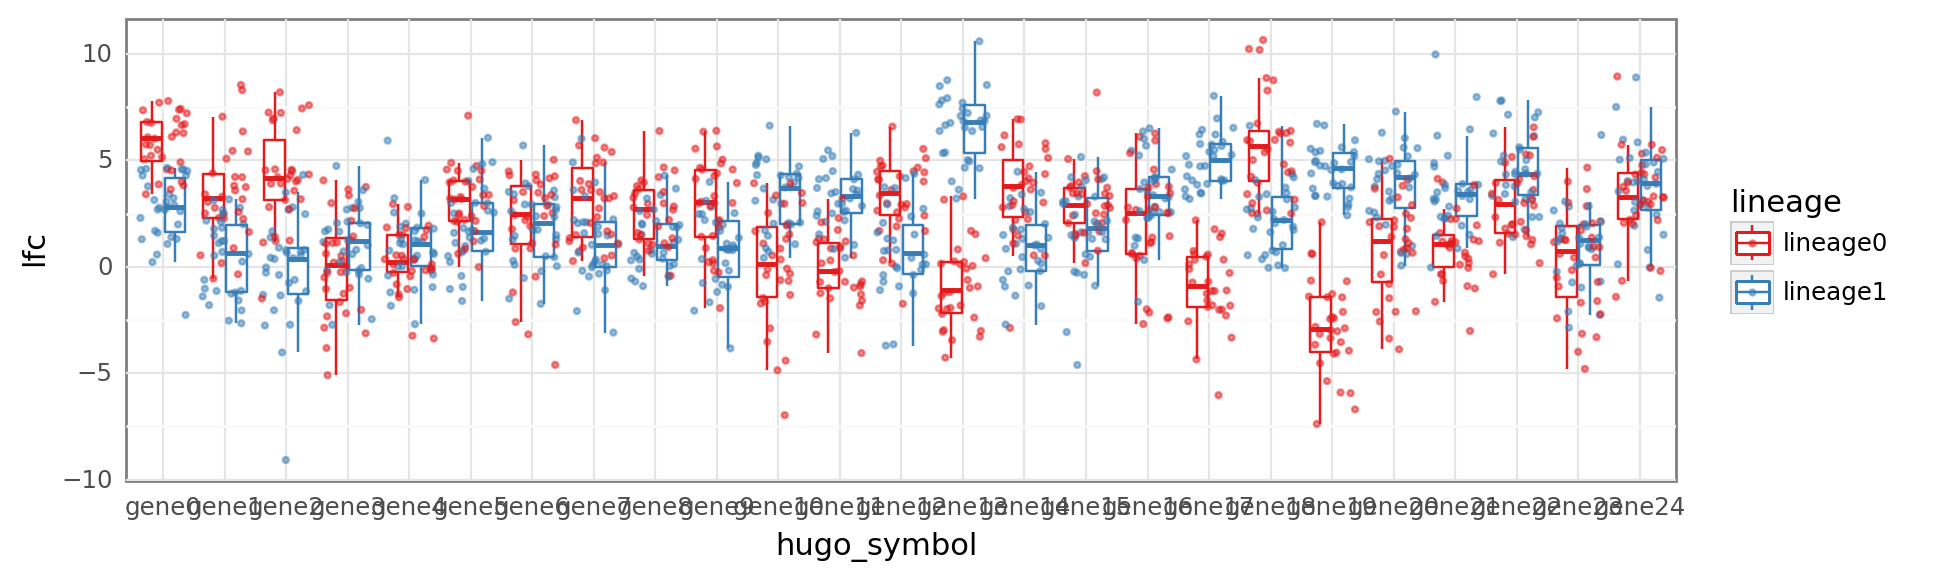

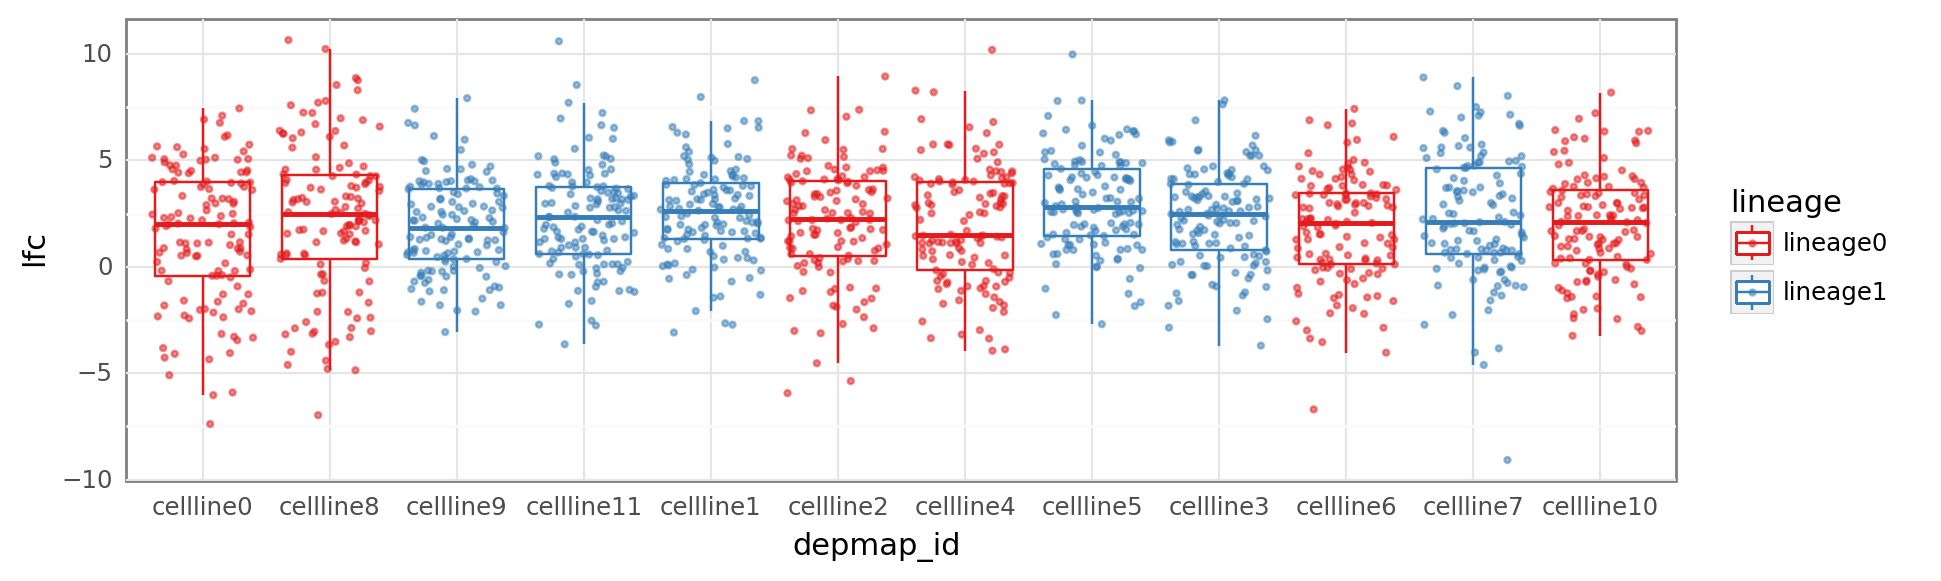

In [10]:
for x in ["hugo_symbol", "depmap_id"]:
    (
        gg.ggplot(mock_data, gg.aes(x=x, y="lfc"))
        + gg.geom_boxplot(gg.aes(color="lineage"), outlier_alpha=0)
        + gg.geom_jitter(gg.aes(color="lineage"), alpha=0.5, size=0.7)
        + gg.scale_color_brewer(type="qual", palette="Set1")
        + gg.theme(figure_size=(10, 3))
    ).draw()

## Model priors

In [11]:
with sp7.model:
    prior_dist = pm.sample_prior_predictive(random_seed=RANDOM_SEED)

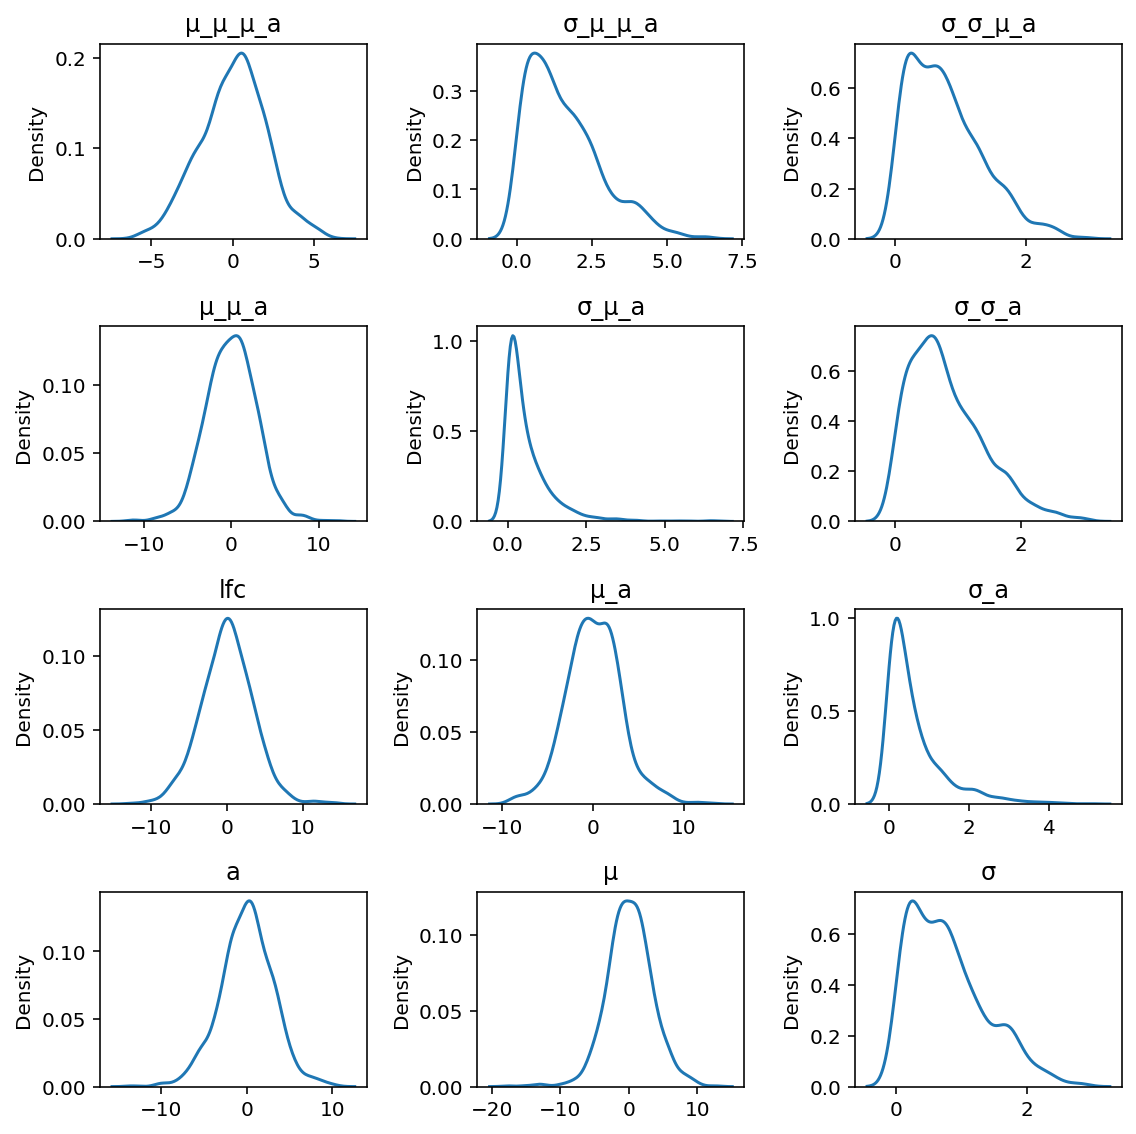

In [12]:
pmanal.plot_all_priors(prior_dist, (4, 3), (8, 8), rm_var_regex="log__|logodds_|offset");

## Model posterior estimates

In [13]:
sbc_manager = sbc.SBCFileManager(sbc_dir)

if sbc_manager.all_data_exists():
    sbc_res = sbc_manager.get_sbc_results()
else:
    FileNotFoundError("Could not locate SBC results data.")

mcmc_res = sbc_res.inference_obj

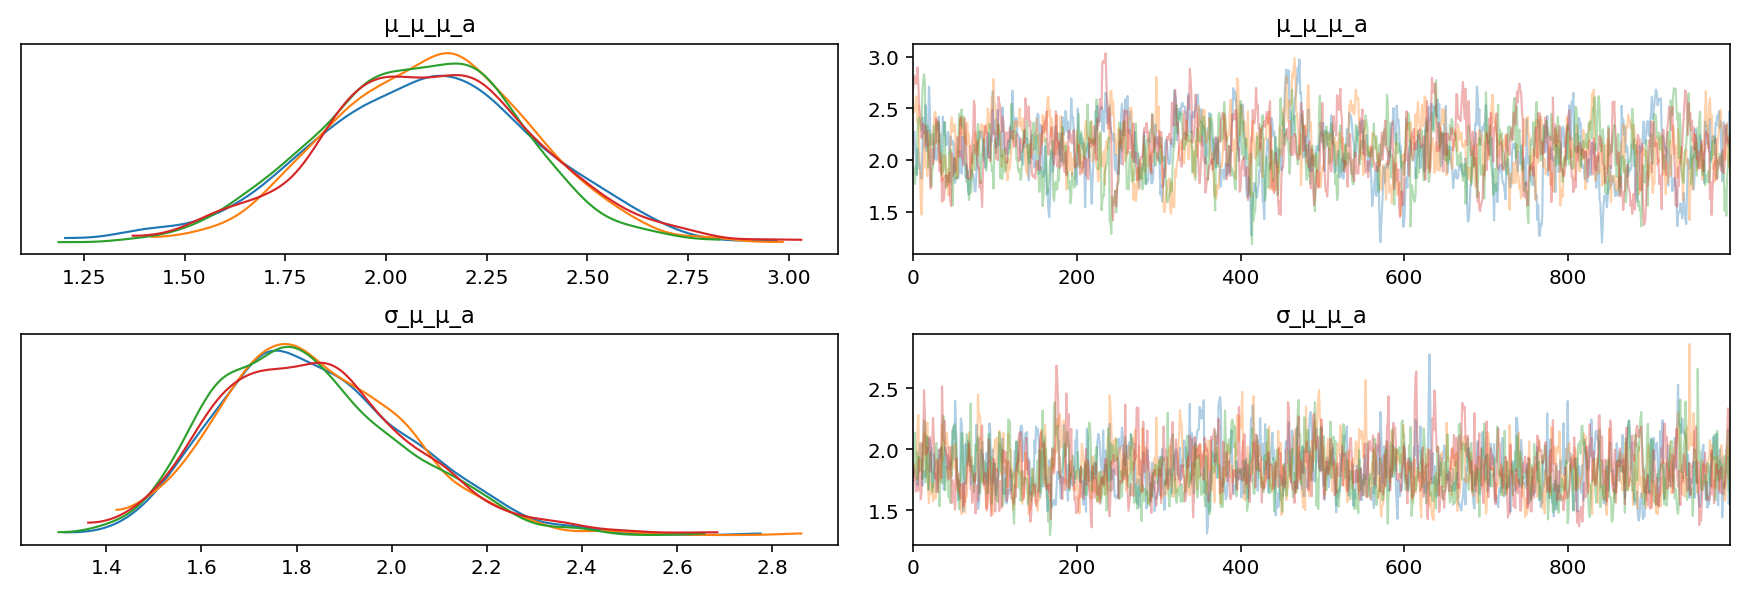

In [14]:
az.plot_trace(mcmc_res, var_names=["μ_μ_μ_a", "σ_μ_μ_a"], compact=False);

In [15]:
var_names = ["μ_μ_μ_a", "σ_μ_μ_a"]
az.summary(mcmc_res, var_names=var_names, hdi_prob=0.89).assign(
    real_value=np.array([sbc_res.priors[v] for v in var_names])
)

mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
μ_μ_μ_a  2.099  0.265     1.687      2.530      0.012    0.008     501.0   
σ_μ_μ_a  1.834  0.198     1.519      2.132      0.006    0.004    1015.0   

         ess_tail  r_hat  real_value  
μ_μ_μ_a     916.0   1.01    1.760227  
σ_μ_μ_a    1877.0   1.00    2.017551

In [16]:
cell_lines = mock_data["depmap_id"].cat.categories.values
genes = mock_data["hugo_symbol"].cat.categories.values

In [17]:
gene_lineage_priors = pd.DataFrame(
    {
        "prior_effect": sbc_res.priors["μ_a"].squeeze().flatten(),
        "hugo_symbol": np.repeat(genes, len(cell_lines)),
        "depmap_id": np.tile(cell_lines, len(genes)),
    }
).merge(
    mock_data[["depmap_id", "lineage"]].drop_duplicates().reset_index(drop=True),
    on="depmap_id",
)

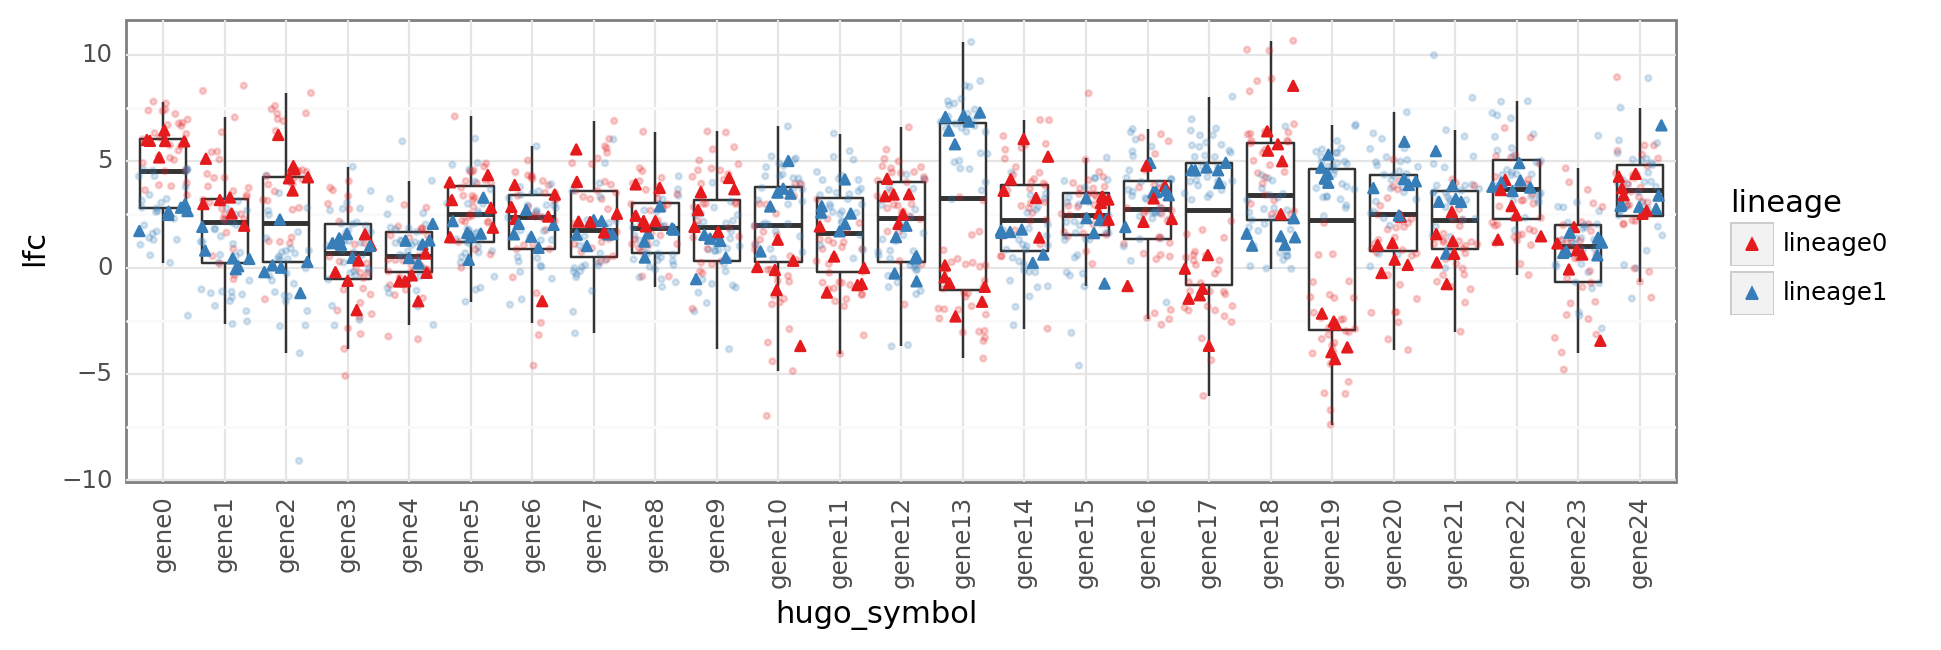

<ggplot: (358079732)>

In [18]:
(
    gg.ggplot(mock_data, gg.aes(x="hugo_symbol", y="lfc"))
    + gg.geom_boxplot(outlier_alpha=0)
    + gg.geom_jitter(gg.aes(color="lineage"), alpha=0.2, size=0.7)
    + gg.geom_jitter(
        gg.aes(x="hugo_symbol", y="prior_effect", color="lineage"),
        data=gene_lineage_priors,
        shape="^",
    )
    + gg.scale_color_brewer(type="qual", palette="Set1")
    + gg.theme(axis_text_x=gg.element_text(angle=90), figure_size=(10, 3))
)

In [19]:
sbc_res.inference_obj.posterior["μ_a"][0, :, :, :].std(axis=0).values.mean(axis=0)

array([0.66133242, 0.6996509 , 0.42541233, 0.4357352 , 0.46750081,
       0.5491823 , 0.58810779, 0.61676122, 0.47529617, 0.52401815,
       0.64305691, 0.56551336])

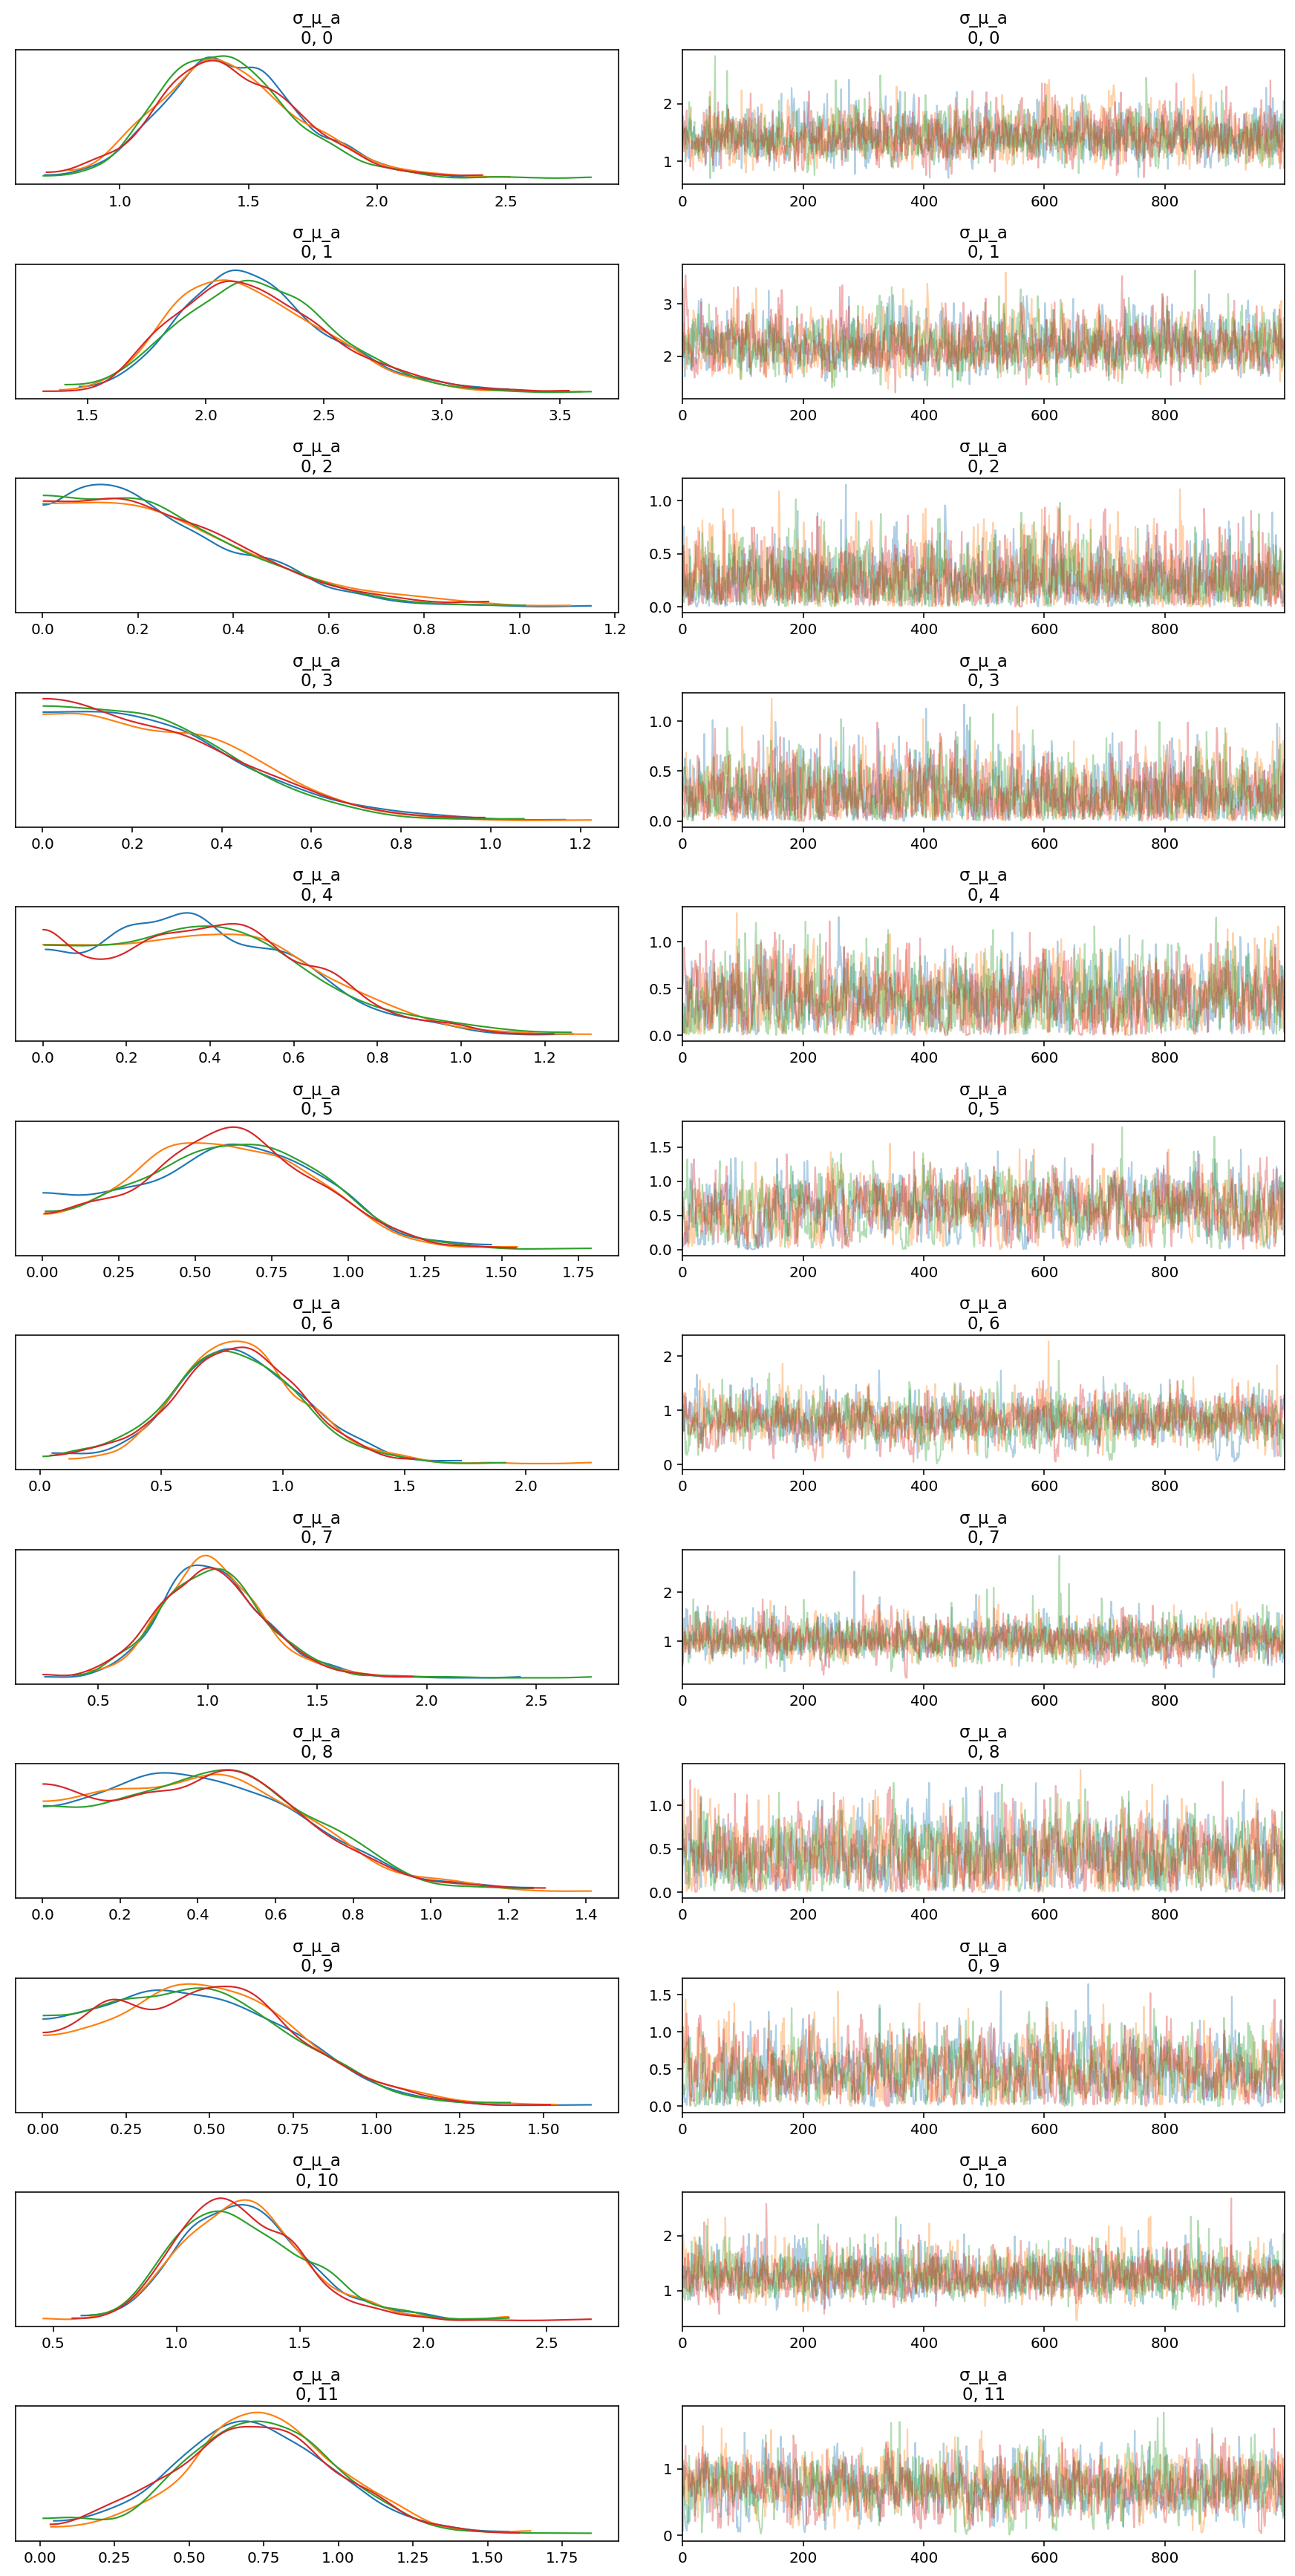

In [20]:
az.plot_trace(sbc_res.inference_obj, "σ_μ_a", compact=False);

In [21]:
az.summary(sbc_res.inference_obj, var_names=["σ_μ_a"]).assign(
    real_values=sbc_res.priors["σ_μ_a"].flatten()
)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
σ_μ_a[0,0]   1.432  0.271   0.951    1.956      0.007    0.005    1628.0   
σ_μ_a[0,1]   2.213  0.324   1.653    2.846      0.008    0.006    1675.0   
σ_μ_a[0,2]   0.264  0.189   0.000    0.600      0.005    0.004    1388.0   
σ_μ_a[0,3]   0.279  0.198   0.000    0.622      0.005    0.003    1605.0   
σ_μ_a[0,4]   0.396  0.240   0.000    0.795      0.007    0.005    1053.0   
σ_μ_a[0,5]   0.598  0.291   0.017    1.052      0.011    0.008     701.0   
σ_μ_a[0,6]   0.809  0.272   0.281    1.329      0.009    0.006     938.0   
σ_μ_a[0,7]   1.027  0.242   0.564    1.468      0.006    0.004    1753.0   
σ_μ_a[0,8]   0.425  0.254   0.001    0.836      0.007    0.005    1169.0   
σ_μ_a[0,9]   0.473  0.277   0.000    0.923      0.010    0.007     796.0   
σ_μ_a[0,10]  1.271  0.258   0.829    1.773      0.006    0.004    1833.0   
σ_μ_a[0,11]  0.728  0.271   0.187    1.218      0.009    0.006     957.0   

             ess_tail  r_hat  real_values  
σ_μ_a[0,0]     2321.0   1.00     1.458551  
σ_μ_a[0,1]     2375.0   1.00     2.125487  
σ_μ_a[0,2]     1826.0   1.00     0.441929  
σ_μ_a[0,3]     1978.0   1.00     0.073488  
σ_μ_a[0,4]     1536.0   1.00     0.045437  
σ_μ_a[0,5]      662.0   1.00     1.077104  
σ_μ_a[0,6]      977.0   1.01     0.770774  
σ_μ_a[0,7]     2172.0   1.00     1.330631  
σ_μ_a[0,8]     2049.0   1.00     0.781001  
σ_μ_a[0,9]     1866.0   1.00     0.463362  
σ_μ_a[0,10]    2612.0   1.00     1.304906  
σ_μ_a[0,11]    1157.0   1.00     0.864411

In [22]:
mu_a_posterior = (
    az.summary(mcmc_res, var_names=["μ_a"], hdi_prob=HDI_PROB)
    .reset_index(drop=False)
    .rename(columns={"index": "parameter"})
    .pipe(
        pmanal.extract_matrix_variable_indices,
        col="parameter",
        idx1=genes,
        idx2=cell_lines,
        idx1name="hugo_symbol",
        idx2name="depmap_id",
    )
    .assign(real_values=sbc_res.priors["μ_a"].flatten())
)

mu_a_posterior.head()

parameter   mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
0  μ_a[0,0]  5.253  0.632     4.238      6.241      0.008    0.006    6452.0   
1  μ_a[0,1]  6.653  0.665     5.580      7.726      0.009    0.006    5756.0   
2  μ_a[0,2]  2.655  0.402     2.044      3.305      0.006    0.004    5107.0   
3  μ_a[0,3]  2.692  0.410     2.075      3.357      0.006    0.004    4954.0   
4  μ_a[0,4]  2.752  0.451     2.063      3.459      0.006    0.004    5204.0   

   ess_tail  r_hat hugo_symbol   depmap_id  real_values  
0    3433.0    1.0       gene0   cellline0     5.929023  
1    3652.0    1.0       gene0   cellline8     5.991952  
2    3708.0    1.0       gene0   cellline9     2.471928  
3    3404.0    1.0       gene0  cellline11     2.650764  
4    3283.0    1.0       gene0   cellline1     2.629355

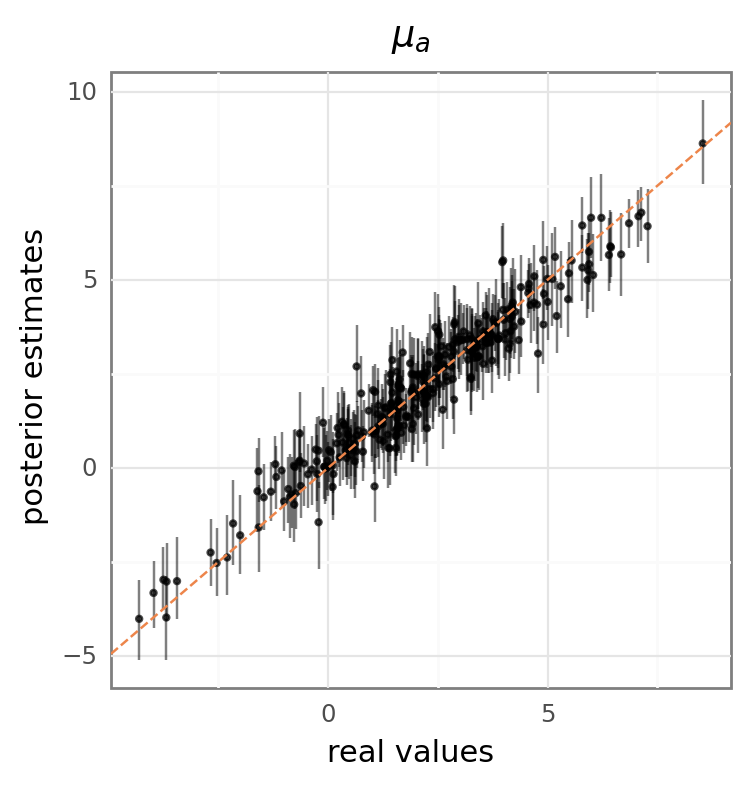

<ggplot: (364690445)>

In [23]:
(
    gg.ggplot(mu_a_posterior, gg.aes(x="real_values", y="mean"))
    + gg.geom_linerange(gg.aes(ymin="hdi_5.5%", ymax="hdi_94.5%"), alpha=0.5)
    + gg.geom_point(alpha=0.7, size=0.7)
    + gg.geom_abline(slope=1, intercept=0, linetype="--", color=SeabornColor.orange)
    + gg.labs(x="real values", y="posterior estimates", title=r"$\mu_a$")
)

## Posterior predictions

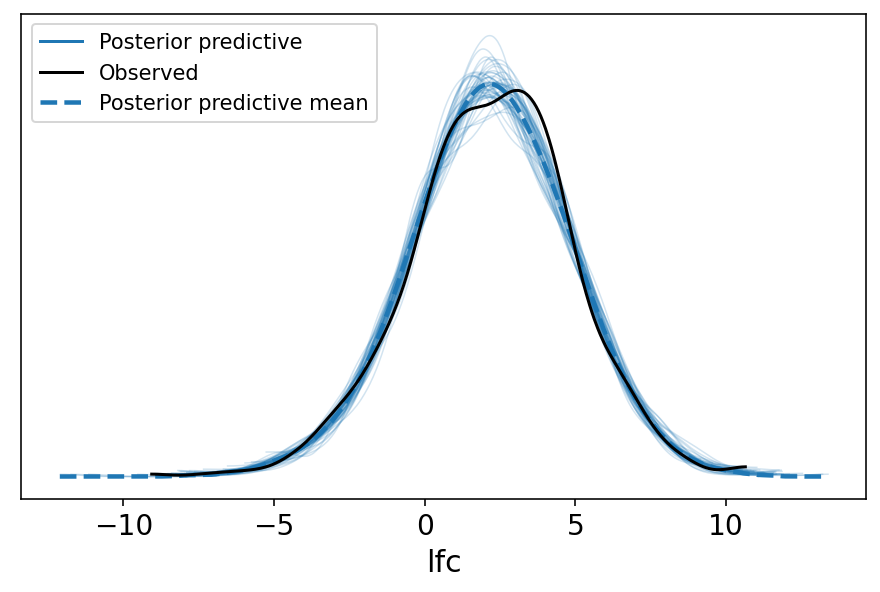

In [24]:
az.plot_ppc(sbc_res.inference_obj, num_pp_samples=50);

In [25]:
sp7_ppc_values = sbc_res.inference_obj.posterior_predictive["lfc"].values.squeeze()
sp7_ppc_hdi = az.hdi(sp7_ppc_values, hdi_prob=HDI_PROB)
sp7_ppc = pd.DataFrame(
    {
        "ppc_mean": sp7_ppc_values.mean(axis=0),
        "ppc_hdi_low": sp7_ppc_hdi[:, 0],
        "ppc_hdi_high": sp7_ppc_hdi[:, 1],
    }
)

sp7_ppc.head()

/usr/local/Caskroom/miniconda/base/envs/speclet/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions


ppc_mean  ppc_hdi_low  ppc_hdi_high
0  5.025570     2.343083      7.658624
1  5.227051     2.806516      7.897670
2  5.144765     2.537676      7.700468
3  5.195156     2.640117      7.681062
4  5.422477     2.894025      8.132373

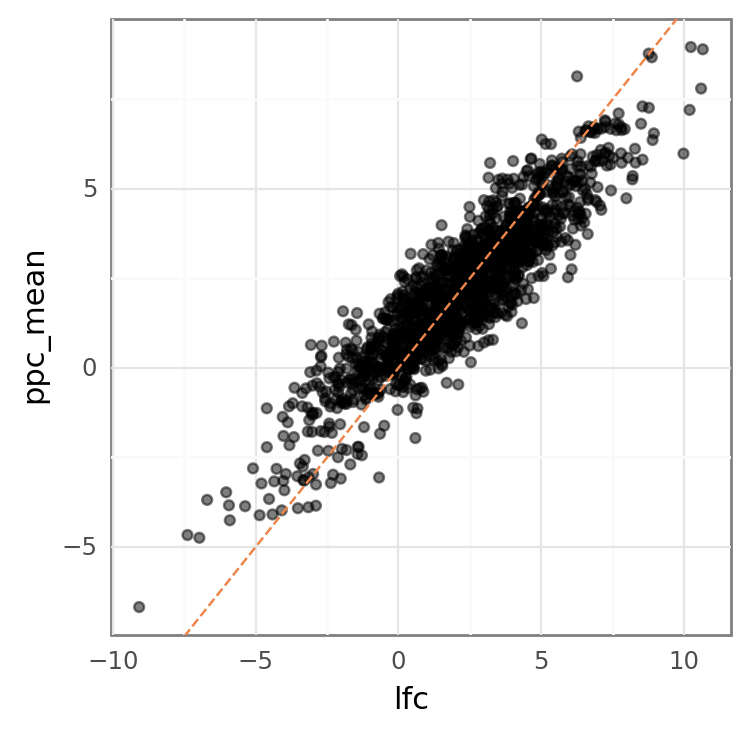

<ggplot: (364545518)>

In [29]:
mock_data_ppc = mock_data.merge(sp7_ppc, left_index=True, right_index=True)

(
    gg.ggplot(mock_data_ppc, gg.aes(x="lfc", y="ppc_mean"))
    + gg.geom_point(alpha=0.5)
    + gg.geom_abline(slope=1, intercept=0, linetype="--", color=SeabornColor.orange)
)

---

In [27]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 11.75 minutes


In [28]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2021-06-15

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

Compiler    : Clang 11.0.1 
OS          : Darwin
Release     : 20.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac.local

Git branch: sp7

re        : 2.2.1
seaborn   : 0.11.1
arviz     : 0.11.2
matplotlib: 3.3.4
pymc3     : 3.11.1
pandas    : 1.2.3
theano    : 1.0.5
plotnine  : 0.7.1
numpy     : 1.20.1

